In [1]:
import numpy as np
import pandas as pd
import torch
_ = torch.manual_seed(10)
import os
import math
from sbi import utils as utils
import sbi
from sbi import inference
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi
import scipy.io as sio

In [2]:
initial_celltracking_data = sio.loadmat("CelltDensity_10k.mat")
#initial_celltracking_data = sio.loadmat("SyntheticData2_CelltDensity_20k.mat")
syn_data = sio.loadmat("syntheticData2_cellDensity.mat")

In [3]:
theta_np = initial_celltracking_data["theta"]
summaries = initial_celltracking_data["summaries"]
obs = syn_data["sy"]

theta = torch.from_numpy(theta_np).to(torch.float32)
x = torch.from_numpy(summaries).to(torch.float32)
x_0 = torch.from_numpy(obs).to(torch.float32)

priorDist = utils.BoxUniform(torch.zeros(6),torch.ones(6))
def simulator(theta):
    return theta
_,prior = prepare_for_sbi(simulator,priorDist)

In [4]:
inference = sbi.inference.SNPE(prior=prior, density_estimator='nsf')
density_estimator = inference.append_simulations(theta, x).train()
posterior = inference.build_posterior(density_estimator)

 Neural network successfully converged after 158 epochs.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

C:\Users\aufb\anaconda3\lib\site-packages\nflows\transforms\lu.py:80: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\BatchLinearAlgebra.cpp:2189.)
  outputs, _ = torch.triangular_solve(


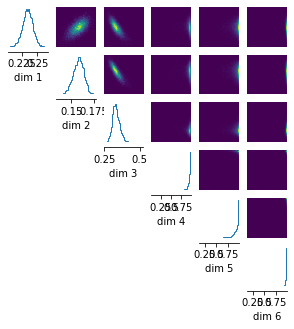

In [5]:
posterior_samples = posterior.sample((10000,),x = x_0) # 50 mins for sampling

from sbi import analysis as analysis
_ = analysis.pairplot(
    posterior_samples, figsize=(5, 5)
)

In [6]:
mdic = {"theta_new": posterior_samples.numpy(), "theta_old":theta.numpy(), "sims_old":x.numpy(),"observation":x_0.numpy()}
sio.savemat("SNPE_nsf_syn2_celldensity_20k.mat", mdic)

In [8]:
proposal = posterior.set_default_x(x_0)

initial_celltracking_data = sio.loadmat("SyntheticData2_CelltDensity_20k.mat")
theta_np = initial_celltracking_data["theta"]
summaries = initial_celltracking_data["summaries"]
obs = syn_data["sy"]

theta = torch.from_numpy(theta_np).to(torch.float32)
x = torch.from_numpy(summaries).to(torch.float32)
x_0 = torch.from_numpy(obs).to(torch.float32)

density_estimator = inference.append_simulations(theta, x, proposal=proposal).train()
posterior = inference.build_posterior(density_estimator)

Using SNPE-C with atomic loss
 Neural network successfully converged after 44 epochs.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

                    accepted. It may take a long time to collect the remaining
                    10000 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.


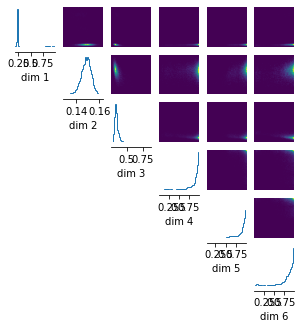

In [14]:
posterior_samples = posterior.sample((10000,),x = x_0) # 50 mins for sampling

from sbi import analysis as analysis
_ = analysis.pairplot(
    posterior_samples, figsize=(5, 5)
)

In [15]:
mdic = {"theta_new": posterior_samples.numpy(), "theta_old":theta.numpy(), "sims_old":x.numpy(),"observation":x_0.numpy()}
sio.savemat("SNPE_nsf_syn2_celldensity_30k.mat", mdic)